In [5]:
import torch
import torchvision
import torchvision.transforms as transforms

In [6]:
transform = transforms.ToTensor()

trainset = torchvision.datasets.CIFAR10(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

100%|██████████| 170M/170M [00:18<00:00, 8.99MB/s]


50000
torch.Size([3, 32, 32]) 6


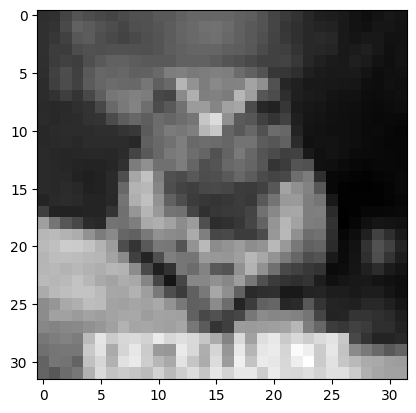

In [7]:
from matplotlib import pyplot as plt


print(len(trainset))
print(trainset[0][0].shape, trainset[0][1])
plt.imshow(trainset[4999][0][0], cmap='gray')

In [8]:
batch_size = 256

trainloader = torch.utils.data.DataLoader(
    trainset,
    batch_size=batch_size,
    shuffle=True
)

In [9]:
testset = torchvision.datasets.CIFAR10(
    root='./data',
    train=False,
    download=True,
    transform=transform
)
testloader = torch.utils.data.DataLoader(
    testset,
    batch_size=batch_size,
    shuffle=False
)

In [10]:
dataiter = iter(trainloader)
images, labels = next(dataiter)
print(images.shape, labels.shape)

torch.Size([256, 3, 32, 32]) torch.Size([256])


In [11]:
from torch import nn


class Model(nn.Module):
  def __init__(self, input_dim, n_dim):
    super().__init__()

    self.layer1 = nn.Linear(input_dim, n_dim)
    self.layer2 = nn.Linear(n_dim, n_dim)
    self.layer3 = nn.Linear(n_dim, 10)

    self.act = nn.LeakyReLU()

  def forward(self, x):
    x = torch.flatten(x, start_dim=1)
    x = self.act(self.layer1(x))
    x = self.act(self.layer2(x))
    x = self.act(self.layer3(x))

    return x


model = Model(32 * 32 * 3, 1024)

In [12]:
from torch import optim

lr = 0.001
model = model.to('cuda')

optimizer = optim.SGD(model.parameters(), lr=lr)

optimizerAdam = optim.Adam(model.parameters(), lr=lr)

In [13]:
import numpy as np

def accuracy(model, dataloader):
  cnt = 0
  acc = 0

  for data in dataloader:
    inputs, labels = data
    inputs, labels = inputs.to('cuda'), labels.to('cuda')

    preds = model(inputs)
    preds = torch.argmax(preds, dim=-1)

    cnt += labels.shape[0]
    acc += (labels == preds).sum().item()

  return acc / cnt

def plot_acc(train_accs, test_accs, label1='train', label2='test'):
  x = np.arange(len(train_accs))

  plt.plot(x, train_accs, label=label1)
  plt.plot(x, test_accs, label=label2)
  plt.legend()
  plt.show()

In [14]:
n_epochs = 50
loss_fn = nn.CrossEntropyLoss()

train_accs = []
test_accs = []

for epoch in range(n_epochs):
  total_loss = 0.
  for data in trainloader:
    model.zero_grad()
    inputs, labels = data
    inputs, labels = inputs.to('cuda'), labels.to('cuda')

    preds = model(inputs)
    loss = loss_fn(preds, labels)
    loss.backward()
    # optimizer.step()
    optimizerAdam.step()

    total_loss += loss.item()

  train_accs.append(accuracy(model, trainloader))
  test_accs.append(accuracy(model, testloader))

  print(f"Epoch {epoch:3d} | Loss: {total_loss}")

Epoch   0 | Loss: 430.1387143135071
Epoch   1 | Loss: 397.9628850221634
Epoch   2 | Loss: 372.98533260822296
Epoch   3 | Loss: 354.63086009025574
Epoch   4 | Loss: 342.52266240119934
Epoch   5 | Loss: 331.6310889720917
Epoch   6 | Loss: 323.2214945554733
Epoch   7 | Loss: 316.65990829467773
Epoch   8 | Loss: 310.84214305877686
Epoch   9 | Loss: 302.5270618200302
Epoch  10 | Loss: 297.9410102367401
Epoch  11 | Loss: 291.8706444501877
Epoch  12 | Loss: 287.1245149374008
Epoch  13 | Loss: 282.4759120941162
Epoch  14 | Loss: 278.32951867580414
Epoch  15 | Loss: 274.8026911020279
Epoch  16 | Loss: 269.37063121795654
Epoch  17 | Loss: 266.4025366306305
Epoch  18 | Loss: 263.20200502872467
Epoch  19 | Loss: 261.458540558815
Epoch  20 | Loss: 257.3122421503067
Epoch  21 | Loss: 252.4505776166916
Epoch  22 | Loss: 249.09393322467804
Epoch  23 | Loss: 247.13842809200287
Epoch  24 | Loss: 242.970893740654
Epoch  25 | Loss: 240.28760027885437
Epoch  26 | Loss: 236.90970981121063
Epoch  27 | Loss: 

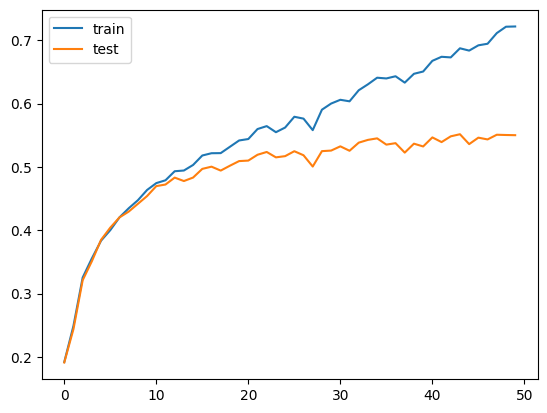

In [15]:
plot_acc(train_accs, test_accs)

In [16]:
class SigmoidModel(nn.Module):
  def __init__(self, input_dim, n_dim):
    super().__init__()

    self.layer1 = nn.Linear(input_dim, n_dim)
    self.layer2 = nn.Linear(n_dim, n_dim)
    self.layer3 = nn.Linear(n_dim, 10)

    self.act = nn.Sigmoid()

  def forward(self, x):
    x = torch.flatten(x, start_dim=1)
    x = self.act(self.layer1(x))
    x = self.act(self.layer2(x))
    x = self.act(self.layer3(x))

    return x


sigmoidModel = SigmoidModel(32 * 32 * 3, 1024)

In [18]:
sigmoidModel = sigmoidModel.to('cuda')

optimizerAdam = optim.Adam(sigmoidModel.parameters(), lr=lr)

sigmoid_train_accs = []
sigmoid_test_accs = []

for epoch in range(n_epochs):
  total_loss = 0.
  for data in trainloader:
    sigmoidModel.zero_grad()
    inputs, labels = data
    inputs, labels = inputs.to('cuda'), labels.to('cuda')

    preds = sigmoidModel(inputs)
    loss = loss_fn(preds, labels)
    loss.backward()
    # optimizer.step()
    optimizerAdam.step()

    total_loss += loss.item()

  sigmoid_train_accs.append(accuracy(sigmoidModel, trainloader))
  sigmoid_test_accs.append(accuracy(sigmoidModel, testloader))

  print(f"Epoch {epoch:3d} | Loss: {total_loss}")

Epoch   0 | Loss: 410.81516444683075
Epoch   1 | Loss: 393.84837782382965
Epoch   2 | Loss: 387.43918776512146
Epoch   3 | Loss: 384.2304240465164
Epoch   4 | Loss: 381.33529245853424
Epoch   5 | Loss: 380.1112003326416
Epoch   6 | Loss: 377.82075095176697
Epoch   7 | Loss: 376.9760365486145
Epoch   8 | Loss: 375.45310521125793
Epoch   9 | Loss: 374.0829291343689
Epoch  10 | Loss: 372.6477173566818
Epoch  11 | Loss: 371.5968246459961
Epoch  12 | Loss: 370.39629220962524
Epoch  13 | Loss: 369.409995675087
Epoch  14 | Loss: 368.93443763256073
Epoch  15 | Loss: 367.8204675912857
Epoch  16 | Loss: 368.0808154344559
Epoch  17 | Loss: 366.6821186542511
Epoch  18 | Loss: 365.824768781662
Epoch  19 | Loss: 364.6625028848648
Epoch  20 | Loss: 365.2701232433319
Epoch  21 | Loss: 364.5062460899353
Epoch  22 | Loss: 364.0222625732422
Epoch  23 | Loss: 363.2968647480011
Epoch  24 | Loss: 362.4270498752594
Epoch  25 | Loss: 361.8475431203842
Epoch  26 | Loss: 361.68999767303467
Epoch  27 | Loss: 360

In [19]:
def plot_acc_multi(train_accs, test_accs, sigmoid_train_accs, sigmoid_test_accs, label1='leaky_ReLU_train', label2='leaky_ReLU_test', label3='sigmoid_train', label4='sigmoid_test'):
  x = np.arange(len(train_accs))

  plt.plot(x, train_accs, label=label1)
  plt.plot(x, test_accs, label=label2)
  plt.plot(x, sigmoid_train_accs, label=label3)
  plt.plot(x, sigmoid_test_accs, label=label4)
  plt.legend()
  plt.show()

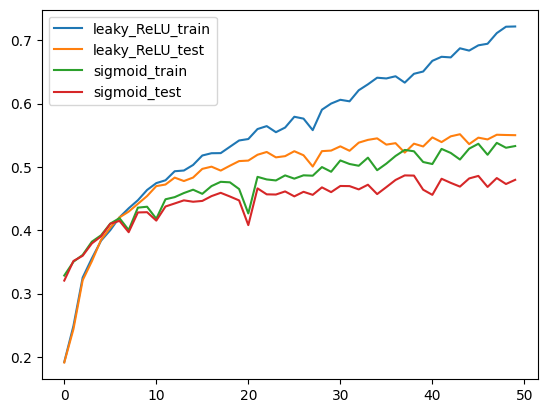

In [20]:
plot_acc_multi(train_accs, test_accs, sigmoid_train_accs, sigmoid_test_accs)

In [21]:
class DropOutModel(nn.Module):
  def __init__(self, input_dim, n_dim):
    super().__init__()

    self.layer1 = nn.Linear(input_dim, n_dim)
    self.layer2 = nn.Linear(n_dim, n_dim)
    self.layer3 = nn.Linear(n_dim, 10)

    self.act = nn.Sigmoid()

    self.dropout = nn.Dropout(p=0.1)

  def forward(self, x):
    x = torch.flatten(x, start_dim=1)
    x = self.dropout(self.act(self.layer1(x)))
    x = self.dropout(self.act(self.layer2(x)))
    x = self.dropout(self.act(self.layer3(x)))

    return x


dropOutModel = DropOutModel(32 * 32 * 3, 1024)

In [22]:
dropOutModel = dropOutModel.to('cuda')

optimizer = optim.Adam(dropOutModel.parameters(), lr=lr)

train_dropout = []
test_dropout = []

for epoch in range(n_epochs):
  total_loss = 0.
  dropOutModel.train()  # 추가된 점 (2)
  for data in trainloader:
    dropOutModel.zero_grad()
    inputs, labels = data
    inputs, labels = inputs.to('cuda'), labels.to('cuda')

    preds = dropOutModel(inputs)
    loss = loss_fn(preds, labels)
    loss.backward()
    optimizer.step()

    total_loss += loss.item()

  with torch.no_grad():  # 추가된 점 (3)
    dropOutModel.eval()         # 추가된 점 (4)
    train_dropout.append(accuracy(dropOutModel, trainloader))
    test_dropout.append(accuracy(dropOutModel, testloader))

  print(f"Epoch {epoch + 1:3d} | Loss: {total_loss}")

Epoch   1 | Loss: 415.19173097610474
Epoch   2 | Loss: 397.2132067680359
Epoch   3 | Loss: 391.51391994953156
Epoch   4 | Loss: 389.31500697135925
Epoch   5 | Loss: 386.9319519996643
Epoch   6 | Loss: 385.2182847261429
Epoch   7 | Loss: 384.5786395072937
Epoch   8 | Loss: 382.3443640470505
Epoch   9 | Loss: 381.827987074852
Epoch  10 | Loss: 380.4465390443802
Epoch  11 | Loss: 379.6380453109741
Epoch  12 | Loss: 378.4511134624481
Epoch  13 | Loss: 376.6254554986954
Epoch  14 | Loss: 376.5030893087387
Epoch  15 | Loss: 375.80981528759
Epoch  16 | Loss: 375.78294336795807
Epoch  17 | Loss: 374.2369339466095
Epoch  18 | Loss: 373.70195031166077
Epoch  19 | Loss: 374.10264670848846
Epoch  20 | Loss: 372.81947362422943
Epoch  21 | Loss: 372.787113070488
Epoch  22 | Loss: 372.3678089380264
Epoch  23 | Loss: 371.78141260147095
Epoch  24 | Loss: 371.4526890516281
Epoch  25 | Loss: 371.5653113126755
Epoch  26 | Loss: 370.1377693414688
Epoch  27 | Loss: 369.74395048618317
Epoch  28 | Loss: 368.8

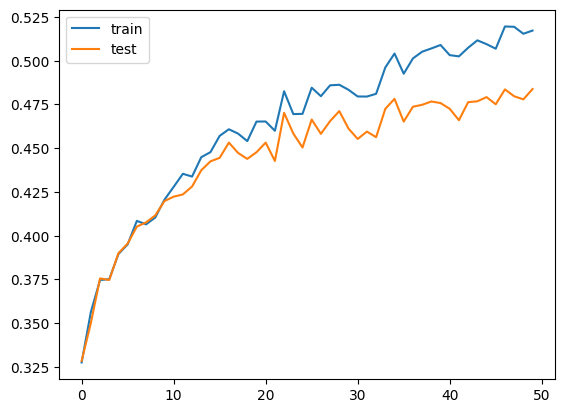

In [24]:
plot_acc(train_dropout, test_dropout)